# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Set base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [75]:
# set up lists to hold reponse info
cities_json = []
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# start retriving data from the openweather website
print('Beginning Data Retrieval')
print('-----------------------------')
for i, city in enumerate(cities):
    try:
        # get the response in json for each city
        response = requests.get(query_url + city).json()
        cities_json.append(response)
        
        # Add data from each response to lists
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {i+1} of {len(cities)} | {city}")
    except:
        # if the information of a city is not found, skip to next city
        print(f"The information for {city} not found. Skipping....")
    # wait for 1 second before the next request
    time.sleep(1)
print('-----------------------------')
print(f'Data Retrieval Complete. Infromation for {len(city_name)} cities found.')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 603 | busselton
Processing Record 2 of 603 | barrow
Processing Record 3 of 603 | nizhniy kuranakh
Processing Record 4 of 603 | albany
Processing Record 5 of 603 | teberda
Processing Record 6 of 603 | behshahr
Processing Record 7 of 603 | tuktoyaktuk
Processing Record 8 of 603 | the valley
Processing Record 9 of 603 | lebu
Processing Record 10 of 603 | ushuaia
Processing Record 11 of 603 | avarua
Processing Record 12 of 603 | guajara
The information for taolanaro not found. Skipping....
Processing Record 14 of 603 | bud
Processing Record 15 of 603 | oyama
Processing Record 16 of 603 | san patricio
Processing Record 17 of 603 | rocha
Processing Record 18 of 603 | bredasdorp
Processing Record 19 of 603 | souillac
Processing Record 20 of 603 | svetlaya
Processing Record 21 of 603 | faanui
Processing Record 22 of 603 | arraial do cabo
Processing Record 23 of 603 | puerto ayora
Processing Record 24 of 603 | puerto 

Processing Record 198 of 603 | husavik
Processing Record 199 of 603 | san matias
Processing Record 200 of 603 | boljevac
Processing Record 201 of 603 | igarka
Processing Record 202 of 603 | saskylakh
Processing Record 203 of 603 | luwingu
Processing Record 204 of 603 | coihaique
The information for tsihombe not found. Skipping....
Processing Record 206 of 603 | tiarei
Processing Record 207 of 603 | kabinda
The information for ho not found. Skipping....
Processing Record 209 of 603 | fare
Processing Record 210 of 603 | olden
Processing Record 211 of 603 | vao
Processing Record 212 of 603 | iqaluit
Processing Record 213 of 603 | ode
Processing Record 214 of 603 | bilma
Processing Record 215 of 603 | hithadhoo
Processing Record 216 of 603 | tadine
Processing Record 217 of 603 | fortuna
Processing Record 218 of 603 | tiksi
Processing Record 219 of 603 | alofi
Processing Record 220 of 603 | sioux lookout
The information for jaipur hat not found. Skipping....
Processing Record 222 of 603 | b

Processing Record 397 of 603 | mareeba
Processing Record 398 of 603 | muros
Processing Record 399 of 603 | mae sai
Processing Record 400 of 603 | harwich
Processing Record 401 of 603 | north augusta
Processing Record 402 of 603 | marfino
Processing Record 403 of 603 | rivne
Processing Record 404 of 603 | strelka
Processing Record 405 of 603 | marystown
Processing Record 406 of 603 | basco
Processing Record 407 of 603 | faya
Processing Record 408 of 603 | lamar
Processing Record 409 of 603 | kitob
The information for nizhneyansk not found. Skipping....
Processing Record 411 of 603 | brownsville
Processing Record 412 of 603 | baherden
The information for igarape-miri not found. Skipping....
Processing Record 414 of 603 | zacler
Processing Record 415 of 603 | kapit
Processing Record 416 of 603 | melilla
Processing Record 417 of 603 | qaqortoq
Processing Record 418 of 603 | celestun
Processing Record 419 of 603 | porvoo
Processing Record 420 of 603 | yunhe
Processing Record 421 of 603 | im

Processing Record 597 of 603 | dunedin
Processing Record 598 of 603 | hariana
Processing Record 599 of 603 | manado
Processing Record 600 of 603 | hualmay
Processing Record 601 of 603 | salisbury
Processing Record 602 of 603 | otjiwarongo
Processing Record 603 of 603 | georgiyevka
-----------------------------
Data Retrieval Complete. Infromation for 555 cities found.
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
# Convert data into a DataFrame   
cities_df = pd.DataFrame({"City": city_name,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})   
# Save the organized dataframe to a .csv file

# cities_df.index.name='City ID'
cities_df.to_csv('cities.csv', index = False, header=True)

# Display the first 5 rows in the DataFrame
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,41.09,64,93,4.97,AU,1633291202
1,Barrow,71.2906,-156.7887,30.22,80,90,12.66,US,1633291187
2,Nizhniy Kuranakh,58.8353,125.4869,19.71,97,38,3.33,RU,1633291208
3,Albany,42.6001,-73.9662,66.09,88,100,1.30,US,1633290937
4,Teberda,43.4456,41.7448,48.06,97,100,4.47,RU,1633291212


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
# check if there is any city with higher than 100 humidity
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.047356,13.714257,63.961261,72.054054,55.709910,7.957279,1.633292e+09
std,33.785168,92.829291,19.185394,21.575925,40.580941,6.105659,2.563382e+02
min,-54.800000,-179.166700,14.130000,3.000000,0.000000,0.000000,1.633291e+09
25%,-6.316700,-68.224450,50.205000,63.000000,11.000000,3.430000,1.633291e+09
50%,24.183300,15.910600,69.240000,78.000000,66.000000,6.350000,1.633292e+09
75%,48.929850,97.002300,78.730000,88.000000,99.000000,10.640000,1.633292e+09
max,78.218600,179.316700,104.290000,100.000000,100.000000,37.980000,1.633292e+09


There are no cities that have humidity > 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

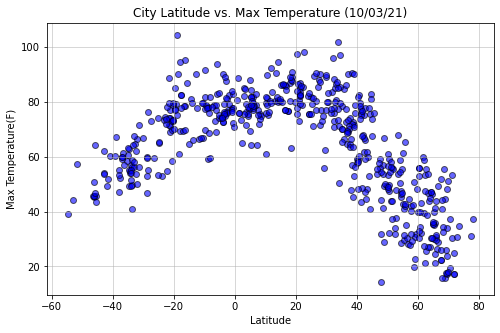

In [91]:
# get the latitude and temperature data from the dataframe
Latitude = cities_df['Lat']
Temperature = cities_df['Max Temp']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Temperature, facecolor='blue', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Max Temperature (10/03/21)')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature(F)')
plt.show()

## Notes:
* This graph is showing the relationship between the temperature and latitude of the cities. 
* It is likely that there is a corrlation between the temperature and latitude. The temperature of the cities is higher when the citie's latitude is closer to 0. 

## Latitude vs. Humidity Plot

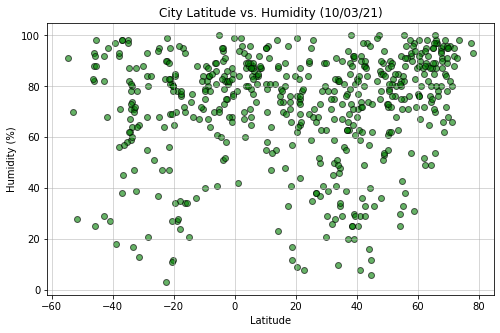

In [92]:
# get the latitude and humidity data from the dataframe
Latitude = cities_df['Lat']
Humidity = cities_df['Humidity']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Humidity, facecolor='green', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Humidity (10/03/21)')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.show()

## Notes:
* This graph is showing the relationship between the humidity and latitude of the cities. 
* There does not seem to be a strong correlation between the humidity and latitude of the cities.

## Latitude vs. Cloudiness Plot

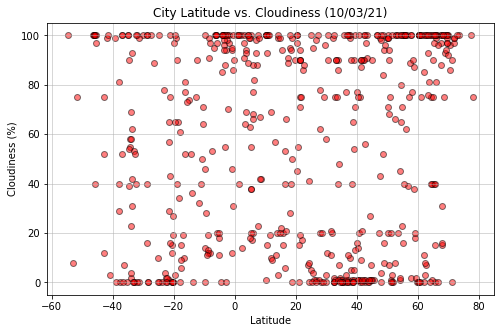

In [94]:
# get the latitude and Cloudiness data from the dataframe
Latitude = cities_df['Lat']
Cloudiness = cities_df['Cloudiness']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Cloudiness, facecolor='r', edgecolor='black',alpha=0.5)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Cloudiness (10/03/21)')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()

## Notes:
* This graph is showing the relationship between the cloudiness and latitude of the cities. 
* There does not seem to be a strong correlation between the cloudiness and latitude of the cities.

## Latitude vs. Wind Speed Plot

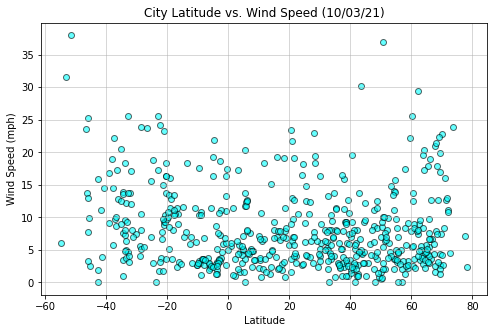

In [99]:
# get the latitude and Wind Speed data from the dataframe
Latitude = cities_df['Lat']
Wind_speed = cities_df['Wind Speed']
plt.figure(figsize=(8,5))

# plot a scatter plot for latitude vs temperature
plt.scatter(Latitude, Wind_speed, facecolor='cyan', edgecolor='black',alpha=0.6)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('City Latitude vs. Wind Speed (10/03/21)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.show()

## Notes:
* This scatter graph is showing the relationship between the wind speed and latitude of the cities. 

## Linear Regression

In [129]:
# genrate the dataframe for Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude)
northern_df = cities_df.loc[cities_df['Lat']>=0, :]
southern_df = cities_df.loc[cities_df['Lat']<0, :]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Barrow,71.2906,-156.7887,30.22,80,90,12.66,US,1633291187
2,Nizhniy Kuranakh,58.8353,125.4869,19.71,97,38,3.33,RU,1633291208
3,Albany,42.6001,-73.9662,66.09,88,100,1.30,US,1633290937
4,Teberda,43.4456,41.7448,48.06,97,100,4.47,RU,1633291212
5,Behshahr,36.6923,53.5526,64.58,77,0,2.44,IR,1633291214


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.661


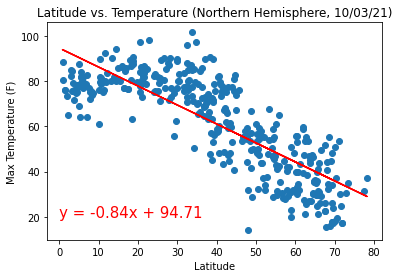

In [113]:
# extract latitude and temperature from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Temperagtue vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature (Northern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the max temperature and latitude of the cities on Northern Hemisphere. 
* There is a moderate correlation between the temperature and latitude with an r-squared of 0.661. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.571


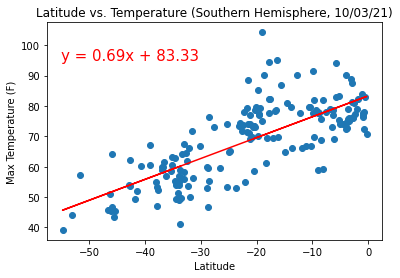

In [116]:
# extract latitude and temperature from the sourthern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of temperature vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature (Southern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the max temperature and latitude of the cities on Southern Hemisphere. 
* There is a moderate correlation between the temperature and latitude with an r-squared of 0.571. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021


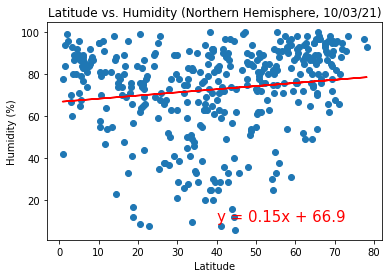

In [118]:
# extract latitude and humidity from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of humidity vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Northern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the humidity and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the humidity and latitude with an r-squared of 0.021. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012


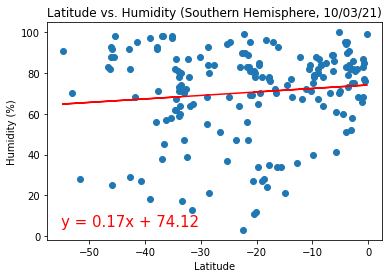

In [121]:
# extract latitude and humidity from the southern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of humidity vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Southern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the humidity and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the humidity and latitude with an r-squared of 0.012. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006


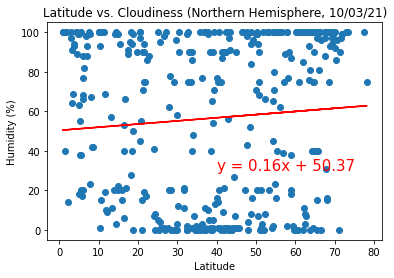

In [123]:
# extract latitude and Cloudiness from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Cloudiness vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Cloudiness (Northern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Cloudiness and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the cloudiness and latitude with an r-squared of 0.006. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008


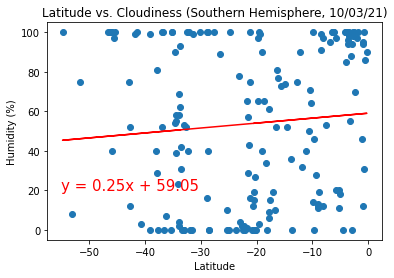

In [126]:
# extract latitude and Cloudiness from the southeren hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Cloudiness vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Cloudiness (Southern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Cloudiness and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the cloudiness and latitude with an r-squared of 0.008. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009


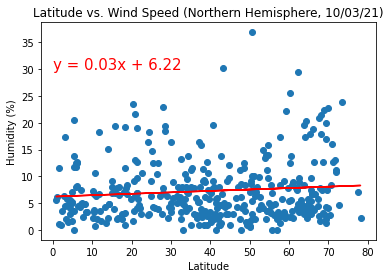

In [128]:
# extract latitude and Wind Speed from the nouthern hemisphere dataframe
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Wind Speed vs. Latitude for the Northern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Wind Speed and latitude of the cities on Northern Hemisphere. 
* There is a very low correlation between the Wind Speed and latitude with an r-squared of 0.009. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.099


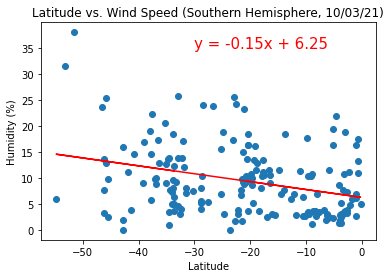

In [132]:
# extract latitude and Wind Speed from the southern hemisphere dataframe
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# calculate liner regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter figure of Wind Speed vs. Latitude for the Southern Hemisphere
plt.scatter(x_values,y_values)

 # Add the linear regression equation and line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere, 10/03/21)')

# Print out the r squared value.
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

## Observable trend based on the data:
* This graph is showing the relationship between the Wind Speed and latitude of the cities on Southern Hemisphere. 
* There is a very low correlation between the Wind Speed and latitude with an r-squared of 0.099. 